DANH SÁCH THÀNH VIÊN NHÓM 16

- K204110562 - Lê Thảo Giang
- K204110567 - Phạm Thị Minh Hòa
- K204110586 - Lê Phước Toàn
- K204110588 - Nguyễn Thị Bảo Trâm
- K204111792 - Thẩm Thị Tú Uyên


# Thu thập dữ liệu statistics


In [1]:
import apiclient
import pandas as pd

In [2]:
KEY = 'xxx'

In [3]:
youtube = apiclient.discovery.build('Youtube', 'v3', developerKey=KEY)

In [5]:
playlist_id = 'PLvahqwMqN4M2N01FfQy2wXkyVyucAL86b' 

In [6]:
# Initialize variables for pagination
next_page_token = None
video_ids = []

while True:
    # Make a request to the API to retrieve video IDs from the playlist
    results = youtube.playlistItems().list(
        part="contentDetails",
        playlistId=playlist_id,
        maxResults=50,  # Maximum is 50
        pageToken=next_page_token
    ).execute()

    # Extract video IDs and append them to the video_ids list
    for item in results['items']:
        video_ids.append(item['contentDetails']['videoId'])

    # Check if there are more pages
    next_page_token = results.get('nextPageToken')

    # If there are no more pages, break out of the loop
    if not next_page_token:
        break

In [8]:
import pandas as pd

In [9]:
# insert video ids into a dataframe
df = pd.DataFrame({'video_id': video_ids})
df

,video_id
0,3ciOn_4XFfE
1,5S7FR_HCg9g
2,ZdmgrN1Bljc
3,1weI6ICx-hg
4,MIlr84gAS0g
...,...
2125,9_JHsiQTTmg
2126,NueLjUNB-GM
2127,-t1781OdVvQ
2128,9r8LG_lCbac


In [90]:
# scrape video details: title, description, tags, category, duration, view_count, like_count, dislike_count, comment_count, published_at based on video ids
video_id = []
title = []
description = []
tags = []
category = []
duration = []
view_count = []
like_count = []
comment_count = []
published_at = []

for i in range(300,310):
    videoID = video_ids[i]

    # make API call
    response = youtube.videos().list(
        part='snippet, contentDetails, statistics',
        id=videoID
    ).execute()

    # extract video details
    # keep the video id
    video_id.append(videoID)
    title.append(response['items'][0]['snippet']['title'])
    description.append(response['items'][0]['snippet']['description'])
    tags.append(response['items'][0]['snippet']['tags'])
    category.append(response['items'][0]['snippet']['categoryId'])
    duration.append(response['items'][0]['contentDetails']['duration'])
    view_count.append(response['items'][0]['statistics']['viewCount'])
    like_count.append(response['items'][0]['statistics']['likeCount'])
    comment_count.append(response['items'][0]['statistics']['commentCount'])
    published_at.append(response['items'][0]['snippet']['publishedAt'])
    # import to dataframe
    videos = pd.DataFrame({'video_id': video_id,
                       'title': title,
                       'description': description,
                       #'tags': tags,
                       'category': category,
                       'duration': duration,
                       'view_count': view_count,
                       'like_count': like_count,
                       'comment_count': comment_count,
                       'published_at': published_at
                       })

In [91]:
videos

,video_id,title,description,category,duration,view_count,like_count,comment_count,published_at
0,E2r4vg3vdkM,The Hatchet Wielding Hitchhiker | Official Tra...,This shocking documentary chronicles a happy-g...,24,PT2M9S,443369,3466,1788,2022-12-13T14:00:00Z
1,f9WMpiH8qd8,Harry & Meghan | Official Trailer 2 | Netflix,Harry & Meghan. The Netflix Global event conti...,24,PT1M24S,958319,6490,9001,2022-12-12T12:00:01Z
2,NpimczviUHA,Alpha Males | Official Trailer | Netflix,Their New Year's resolution is to stop being t...,24,PT1M52S,163964,1584,334,2022-12-12T09:00:00Z
3,k31dKoFsniU,MADOFF: The Monster of Wall Street | Official ...,"With an innovative visual approach, Madoff: Th...",24,PT2M,757390,8493,550,2022-12-08T17:00:00Z
4,ddbL9jvg77w,The Pale Blue Eye | Official Trailer | Netflix,"West Point, 1830. A world-weary detective is h...",24,PT2M23S,6393471,85829,3169,2022-12-07T15:00:00Z
5,tnZOg_zCYCI,Treason | Official Trailer | Netflix,When the past catches up with the newly appoin...,24,PT2M24S,1863953,33383,1828,2022-12-07T10:00:01Z
6,2rlVhiXlcHU,Harry & Meghan | Official Trailer | Netflix,Harry & Meghan. Watch the Netflix Global Event...,24,PT1M17S,3301723,24464,26240,2022-12-05T12:00:01Z
7,6nhwT1vQS68,The Witcher: Blood Origin | Official Trailer |...,"Taking place in the elven Golden Era, 1200 yea...",24,PT2M34S,2344691,31373,10121,2022-12-03T18:24:18Z
8,ctFGAnpADEU,Paradise PD: Season 4 | Official Trailer | Net...,Pump up the jam! Paradise PD returns December ...,24,PT2M39S,133110,2792,408,2022-12-02T18:00:00Z
9,neYwnVMfN7A,A storm for Christmas | Official Trailer | Net...,The day before Christmas many flights are canc...,24,PT2M25S,301187,3539,192,2022-12-02T08:00:00Z


In [92]:
# export to csv 
videos.to_csv('video_details300_310.csv', index=False)

In [93]:
#read
df = pd.read_csv('video_details205_214.csv')
df1 = pd.read_csv('video_details215_225.csv')
df2 = pd.read_csv('video_details225_235.csv')
df3 = pd.read_csv('video_details225_238.csv')  
df4 = pd.read_csv('video_details239_250.csv') 
df5 = pd.read_csv('video_details253_260.csv')
df6 = pd.read_csv('video_details260_270.csv')
df7 = pd.read_csv('video_details270_280.csv')
df8 = pd.read_csv('video_details280_282.csv')
df9 = pd.read_csv('video_details283_289.csv')
df10 = pd.read_csv('video_details290_300.csv')
df11 = pd.read_csv('video_details300_310.csv')

In [94]:
#concat
df = pd.concat([df, df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], ignore_index=True)
df


,video_id,title,description,category,duration,view_count,like_count,comment_count,published_at
0,iH8XAOOwuiw,One More Time | Official Trailer | Netflix,"A second, third, fourth…chance at being 18 aga...",24,PT2M33S,394426,4521,177,2023-04-05T07:00:18Z
1,YE_9gOc9wWk,The Nurse | Official Trailer | Netflix,"Pernille Kurzmann Larsen, a fresh-faced nurse ...",24,PT2M12S,448470,3927,218,2023-04-04T07:00:18Z
2,mO0OuR26IZM,EXTRACTION 2 | Official Teaser Trailer | Netflix,Chris Hemsworth returns as Tyler Rake in EXTRA...,24,PT2M4S,11341709,224288,9162,2023-04-03T13:30:00Z
3,twCa_m7CwhE,King of Collectibles: The Goldin Touch | Offic...,Ken Goldin and his savvy team run the thrillin...,24,PT1M52S,104827,1378,137,2023-03-31T15:00:00Z
4,044PUmZQd1g,AKA | Official Trailer | Netflix,A steely special ops agent finds himself in a ...,24,PT2M3S,1222226,5502,367,2023-03-30T08:00:00Z
...,...,...,...,...,...,...,...,...,...
96,tnZOg_zCYCI,Treason | Official Trailer | Netflix,When the past catches up with the newly appoin...,24,PT2M24S,1863953,33383,1828,2022-12-07T10:00:01Z
97,2rlVhiXlcHU,Harry & Meghan | Official Trailer | Netflix,Harry & Meghan. Watch the Netflix Global Event...,24,PT1M17S,3301723,24464,26240,2022-12-05T12:00:01Z
98,6nhwT1vQS68,The Witcher: Blood Origin | Official Trailer |...,"Taking place in the elven Golden Era, 1200 yea...",24,PT2M34S,2344691,31373,10121,2022-12-03T18:24:18Z
99,ctFGAnpADEU,Paradise PD: Season 4 | Official Trailer | Net...,Pump up the jam! Paradise PD returns December ...,24,PT2M39S,133110,2792,408,2022-12-02T18:00:00Z


In [ ]:
#save to csv
df.to_csv('video_details205_310.csv', index=False)

In [4]:
#read
df= pd.read_csv('Video Statistics.csv')
df1 = pd.read_csv('video_details205_310.csv')


In [5]:
#concat
df = pd.concat([df, df1], ignore_index=True)
df

,video_id,title,description,category,duration,view_count,like_count,comment_count,published_at
0,3ciOn_4XFfE,Blue Eye Samurai | Official Trailer #2 | Netflix,This provocative and visually stunning cinemat...,24,PT1M45S,38564,1264,55,2023-10-27T16:30:00Z
1,5S7FR_HCg9g,THE KILLER | Official Trailer | Netflix,"Michael Fassbender stars in The Killer, a new ...",24,PT2M15S,3273239,13752,676,2023-10-27T14:00:00Z
2,ZdmgrN1Bljc,The Tailor: Season 3 | Official Trailer | Netflix,"It's time to speak the truth. Tailor, with its...",24,PT1M22S,30187,655,39,2023-10-27T07:00:00Z
3,1weI6ICx-hg,The Crown: Season 6 | Part 1 Trailer | Netflix,The final chapter begins November 16th.\n\nIns...,24,PT2M23S,3691953,17728,1218,2023-10-26T15:00:00Z
4,MIlr84gAS0g,Nothing to See Here | Official Trailer | Netflix,"Alexis, a young blind man who dreams of being ...",24,PT2M6S,130996,1088,27,2023-10-24T16:00:00Z
...,...,...,...,...,...,...,...,...,...
296,tnZOg_zCYCI,Treason | Official Trailer | Netflix,When the past catches up with the newly appoin...,24,PT2M24S,1863953,33383,1828,2022-12-07T10:00:01Z
297,2rlVhiXlcHU,Harry & Meghan | Official Trailer | Netflix,Harry & Meghan. Watch the Netflix Global Event...,24,PT1M17S,3301723,24464,26240,2022-12-05T12:00:01Z
298,6nhwT1vQS68,The Witcher: Blood Origin | Official Trailer |...,"Taking place in the elven Golden Era, 1200 yea...",24,PT2M34S,2344691,31373,10121,2022-12-03T18:24:18Z
299,ctFGAnpADEU,Paradise PD: Season 4 | Official Trailer | Net...,Pump up the jam! Paradise PD returns December ...,24,PT2M39S,133110,2792,408,2022-12-02T18:00:00Z


In [7]:
# save to csv
df.to_csv('Dataset_Statistics.csv', index=False)

In [8]:
df

,video_id,title,description,category,duration,view_count,like_count,comment_count,published_at
0,3ciOn_4XFfE,Blue Eye Samurai | Official Trailer #2 | Netflix,This provocative and visually stunning cinemat...,24,PT1M45S,38564,1264,55,2023-10-27T16:30:00Z
1,5S7FR_HCg9g,THE KILLER | Official Trailer | Netflix,"Michael Fassbender stars in The Killer, a new ...",24,PT2M15S,3273239,13752,676,2023-10-27T14:00:00Z
2,ZdmgrN1Bljc,The Tailor: Season 3 | Official Trailer | Netflix,"It's time to speak the truth. Tailor, with its...",24,PT1M22S,30187,655,39,2023-10-27T07:00:00Z
3,1weI6ICx-hg,The Crown: Season 6 | Part 1 Trailer | Netflix,The final chapter begins November 16th.\n\nIns...,24,PT2M23S,3691953,17728,1218,2023-10-26T15:00:00Z
4,MIlr84gAS0g,Nothing to See Here | Official Trailer | Netflix,"Alexis, a young blind man who dreams of being ...",24,PT2M6S,130996,1088,27,2023-10-24T16:00:00Z
...,...,...,...,...,...,...,...,...,...
296,tnZOg_zCYCI,Treason | Official Trailer | Netflix,When the past catches up with the newly appoin...,24,PT2M24S,1863953,33383,1828,2022-12-07T10:00:01Z
297,2rlVhiXlcHU,Harry & Meghan | Official Trailer | Netflix,Harry & Meghan. Watch the Netflix Global Event...,24,PT1M17S,3301723,24464,26240,2022-12-05T12:00:01Z
298,6nhwT1vQS68,The Witcher: Blood Origin | Official Trailer |...,"Taking place in the elven Golden Era, 1200 yea...",24,PT2M34S,2344691,31373,10121,2022-12-03T18:24:18Z
299,ctFGAnpADEU,Paradise PD: Season 4 | Official Trailer | Net...,Pump up the jam! Paradise PD returns December ...,24,PT2M39S,133110,2792,408,2022-12-02T18:00:00Z


# Tiền xử lý dữ liệu 

## Khai báo thư viện

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Đọc dữ liệu

In [2]:
df=pd.read_csv('Dataset_Statistics_Final.csv')
df

,video_id,title,description,category,duration,view_count,like_count,comment_count,published_at
0,3ciOn_4XFfE,Blue Eye Samurai | Official Trailer #2 | Netflix,This provocative and visually stunning cinemat...,24,PT1M45S,38564,1264,55,2023-10-27T16:30:00Z
1,5S7FR_HCg9g,THE KILLER | Official Trailer | Netflix,"Michael Fassbender stars in The Killer, a new ...",24,PT2M15S,3273239,13752,676,2023-10-27T14:00:00Z
2,ZdmgrN1Bljc,The Tailor: Season 3 | Official Trailer | Netflix,"It's time to speak the truth. Tailor, with its...",24,PT1M22S,30187,655,39,2023-10-27T07:00:00Z
3,1weI6ICx-hg,The Crown: Season 6 | Part 1 Trailer | Netflix,The final chapter begins November 16th.\n\nIns...,24,PT2M23S,3691953,17728,1218,2023-10-26T15:00:00Z
4,MIlr84gAS0g,Nothing to See Here | Official Trailer | Netflix,"Alexis, a young blind man who dreams of being ...",24,PT2M6S,130996,1088,27,2023-10-24T16:00:00Z
...,...,...,...,...,...,...,...,...,...
290,tnZOg_zCYCI,Treason | Official Trailer | Netflix,When the past catches up with the newly appoin...,24,PT2M24S,1863953,33383,1828,2022-12-07T10:00:01Z
291,2rlVhiXlcHU,Harry & Meghan | Official Trailer | Netflix,Harry & Meghan. Watch the Netflix Global Event...,24,PT1M17S,3301723,24464,26240,2022-12-05T12:00:01Z
292,6nhwT1vQS68,The Witcher: Blood Origin | Official Trailer |...,"Taking place in the elven Golden Era, 1200 yea...",24,PT2M34S,2344691,31373,10121,2022-12-03T18:24:18Z
293,ctFGAnpADEU,Paradise PD: Season 4 | Official Trailer | Net...,Pump up the jam! Paradise PD returns December ...,24,PT2M39S,133110,2792,408,2022-12-02T18:00:00Z


## Kiểm tra kiểu dữ liệu

In [3]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       295 non-null    object
 1   title          295 non-null    object
 2   description    295 non-null    object
 3   category       295 non-null    int64 
 4   duration       295 non-null    object
 5   view_count     295 non-null    int64 
 6   like_count     295 non-null    int64 
 7   comment_count  295 non-null    int64 
 8   published_at   295 non-null    object
dtypes: int64(4), object(5)
memory usage: 20.9+ KB


In [4]:
# Change the type of publishedAt to datetime
df['published_at'] = pd.to_datetime(df['published_at'])
df['published_weekday'] = df['published_at'].dt.day_name()
df['publish_year'] = df['published_at'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   video_id           295 non-null    object             
 1   title              295 non-null    object             
 2   description        295 non-null    object             
 3   category           295 non-null    int64              
 4   duration           295 non-null    object             
 5   view_count         295 non-null    int64              
 6   like_count         295 non-null    int64              
 7   comment_count      295 non-null    int64              
 8   published_at       295 non-null    datetime64[ns, UTC]
 9   published_weekday  295 non-null    object             
 10  publish_year       295 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 25.5+ KB


In [5]:
df.head()

,video_id,title,description,category,duration,view_count,like_count,comment_count,published_at,published_weekday,publish_year
0,3ciOn_4XFfE,Blue Eye Samurai | Official Trailer #2 | Netflix,This provocative and visually stunning cinemat...,24,PT1M45S,38564,1264,55,2023-10-27 16:30:00+00:00,Friday,2023
1,5S7FR_HCg9g,THE KILLER | Official Trailer | Netflix,"Michael Fassbender stars in The Killer, a new ...",24,PT2M15S,3273239,13752,676,2023-10-27 14:00:00+00:00,Friday,2023
2,ZdmgrN1Bljc,The Tailor: Season 3 | Official Trailer | Netflix,"It's time to speak the truth. Tailor, with its...",24,PT1M22S,30187,655,39,2023-10-27 07:00:00+00:00,Friday,2023
3,1weI6ICx-hg,The Crown: Season 6 | Part 1 Trailer | Netflix,The final chapter begins November 16th.\n\nIns...,24,PT2M23S,3691953,17728,1218,2023-10-26 15:00:00+00:00,Thursday,2023
4,MIlr84gAS0g,Nothing to See Here | Official Trailer | Netflix,"Alexis, a young blind man who dreams of being ...",24,PT2M6S,130996,1088,27,2023-10-24 16:00:00+00:00,Tuesday,2023


In [6]:
#drop the column 'category' and 'duration'
df.drop(['category','duration'],axis=1,inplace=True)
df

,video_id,title,description,view_count,like_count,comment_count,published_at,published_weekday,publish_year
0,3ciOn_4XFfE,Blue Eye Samurai | Official Trailer #2 | Netflix,This provocative and visually stunning cinemat...,38564,1264,55,2023-10-27 16:30:00+00:00,Friday,2023
1,5S7FR_HCg9g,THE KILLER | Official Trailer | Netflix,"Michael Fassbender stars in The Killer, a new ...",3273239,13752,676,2023-10-27 14:00:00+00:00,Friday,2023
2,ZdmgrN1Bljc,The Tailor: Season 3 | Official Trailer | Netflix,"It's time to speak the truth. Tailor, with its...",30187,655,39,2023-10-27 07:00:00+00:00,Friday,2023
3,1weI6ICx-hg,The Crown: Season 6 | Part 1 Trailer | Netflix,The final chapter begins November 16th.\n\nIns...,3691953,17728,1218,2023-10-26 15:00:00+00:00,Thursday,2023
4,MIlr84gAS0g,Nothing to See Here | Official Trailer | Netflix,"Alexis, a young blind man who dreams of being ...",130996,1088,27,2023-10-24 16:00:00+00:00,Tuesday,2023
...,...,...,...,...,...,...,...,...,...
290,tnZOg_zCYCI,Treason | Official Trailer | Netflix,When the past catches up with the newly appoin...,1863953,33383,1828,2022-12-07 10:00:01+00:00,Wednesday,2022
291,2rlVhiXlcHU,Harry & Meghan | Official Trailer | Netflix,Harry & Meghan. Watch the Netflix Global Event...,3301723,24464,26240,2022-12-05 12:00:01+00:00,Monday,2022
292,6nhwT1vQS68,The Witcher: Blood Origin | Official Trailer |...,"Taking place in the elven Golden Era, 1200 yea...",2344691,31373,10121,2022-12-03 18:24:18+00:00,Saturday,2022
293,ctFGAnpADEU,Paradise PD: Season 4 | Official Trailer | Net...,Pump up the jam! Paradise PD returns December ...,133110,2792,408,2022-12-02 18:00:00+00:00,Friday,2022


## Kiểm tra các giá trị trỗng và trùng lặp

In [7]:
#check the duplicates
df.duplicated().sum()

2

In [8]:
#delete duplicate value
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Check Null value
null_values = pd.DataFrame({'Number': df.isnull().sum(), 'Percentage': (df.isnull().sum()/df.shape[0])*100})
null_values

,Number,Percentage
video_id,0,0.0
title,0,0.0
description,0,0.0
view_count,0,0.0
like_count,0,0.0
comment_count,0,0.0
published_at,0,0.0
published_weekday,0,0.0
publish_year,0,0.0


In [10]:
df.isnull().sum()

video_id             0
title                0
description          0
view_count           0
like_count           0
comment_count        0
published_at         0
published_weekday    0
publish_year         0
dtype: int64

In [11]:
# Describe numerical data
df.describe()

,view_count,like_count,comment_count,publish_year
count,2.930000e+02,293.000000,293.000000,293.000000
mean,1.677755e+06,21072.897611,1452.993174,2022.931741
std,2.822287e+06,42565.697306,3559.952209,0.252622
min,2.541900e+04,429.000000,27.000000,2022.000000
25%,1.801110e+05,1950.000000,199.000000,2023.000000
50%,5.305080e+05,6176.000000,461.000000,2023.000000
75%,1.863953e+06,19082.000000,1362.000000,2023.000000
max,1.928662e+07,434011.000000,46183.000000,2023.000000


Sau khi kiểm tra thì không có dữ liệu nào bất thường

# Phân tích khám phá dữ liệu

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Top 10 trailer videos với lượt xem, lượt like và lượt comment cao nhất

In [13]:
df['video_id'].nunique()

292

In [14]:
custom_colors = ['#221f1f', '#666666', '#b20710', '#FF0000','#f5f5f1']

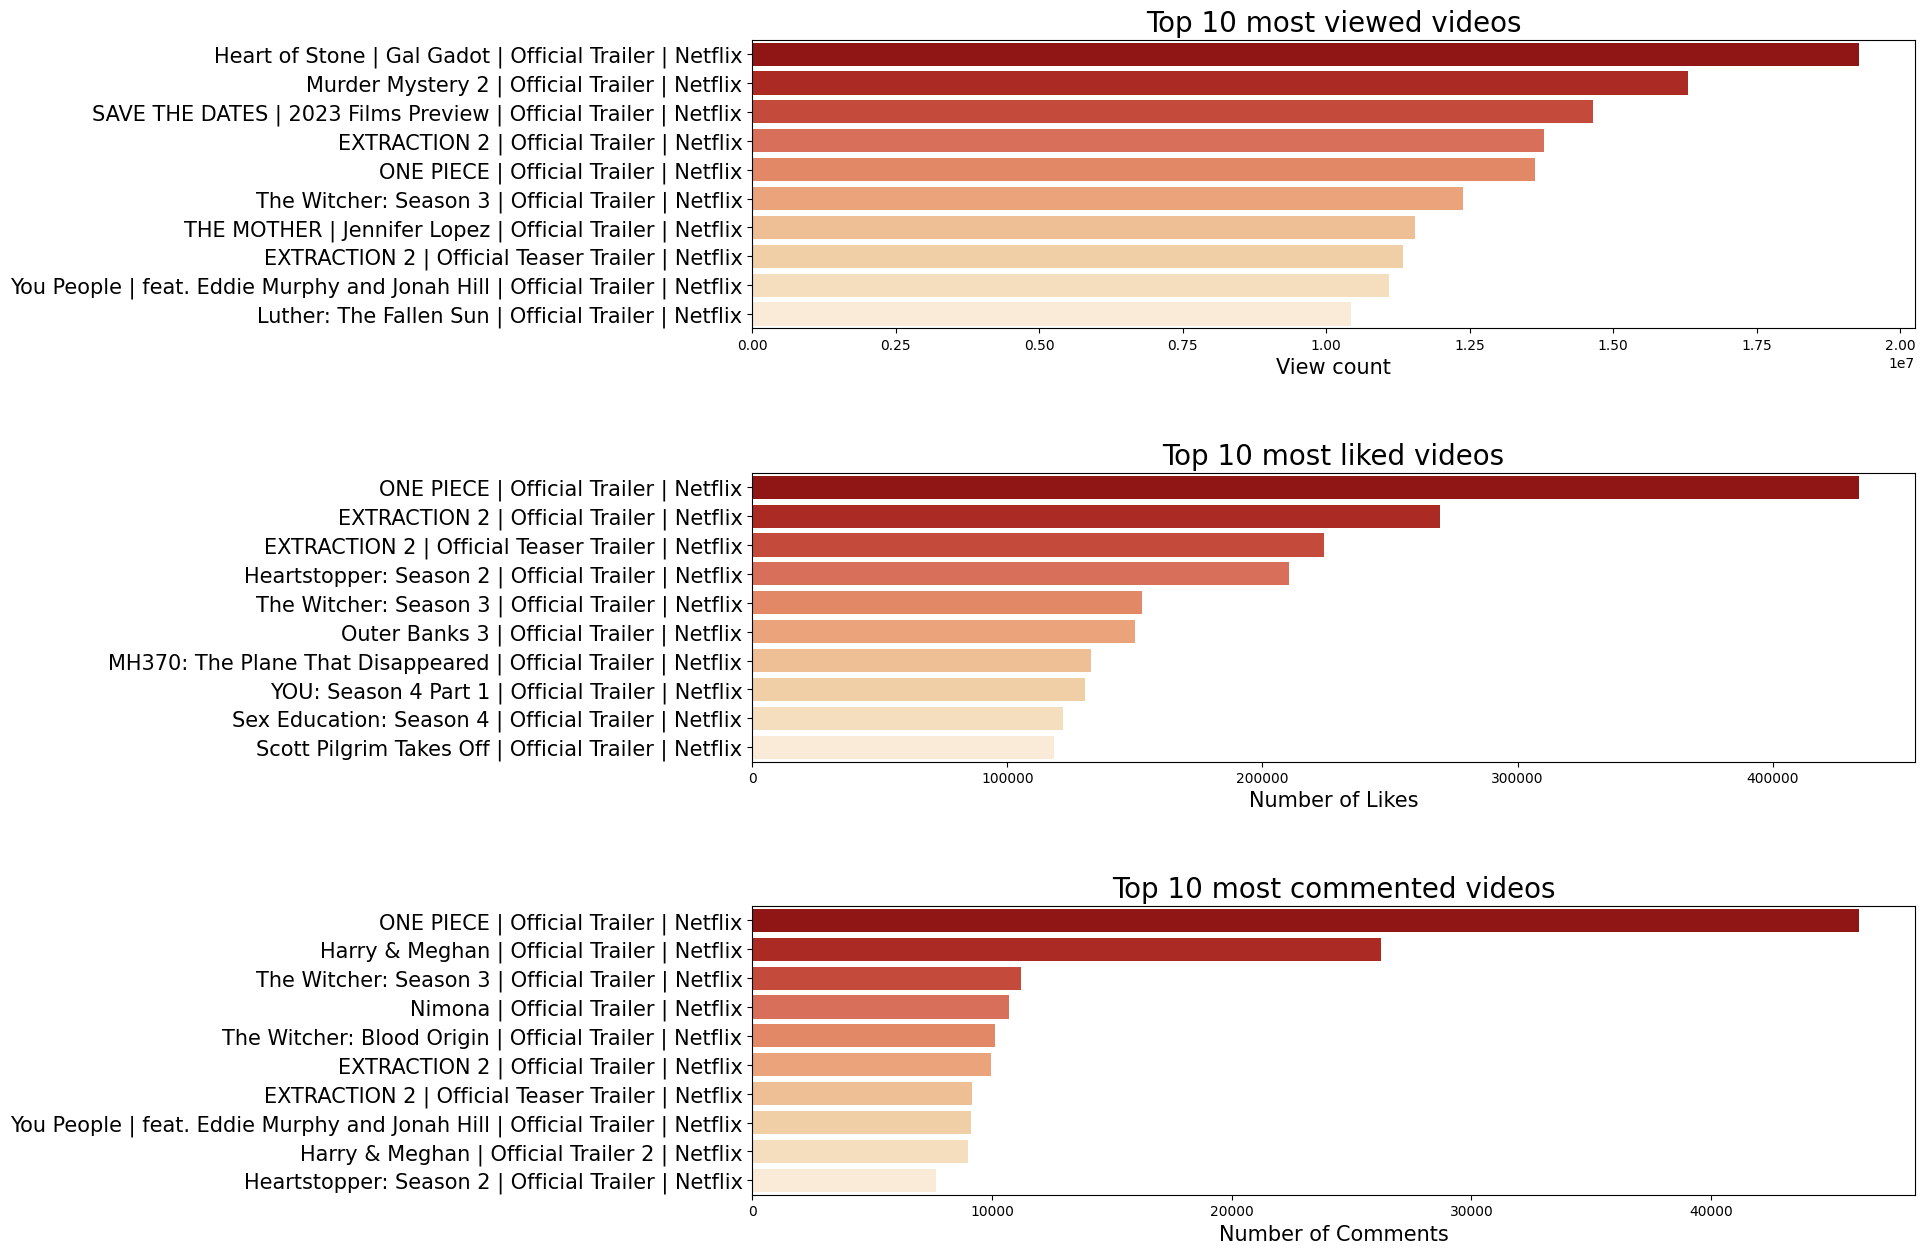

In [15]:
top10_views = df.sort_values(by='view_count', ascending=False).head(10)
top10_likes = df.sort_values(by='like_count', ascending=False).head(10)
top10_cmt = df.sort_values(by='comment_count', ascending=False).head(10)
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.barplot(x='view_count', y='title', data=top10_views, palette='OrRd_r')
plt.title('Top 10 most viewed videos', size=20)
plt.xlabel('View count', size=15)
plt.ylabel('', size = 15)
plt.yticks(size=15)

plt.subplot(3,1,2)
sns.barplot(x='like_count', y='title', data=top10_likes, palette='OrRd_r')
plt.title('Top 10 most liked videos', size=20)
plt.xlabel('Number of Likes', size=15)
plt.ylabel('', size = 15)
plt.yticks(size=15)

plt.subplot(3,1,3)
sns.barplot(x='comment_count', y='title', data=top10_cmt, palette='OrRd_r')
plt.title('Top 10 most commented videos', size=20)
plt.xlabel('Number of Comments', size=15)
plt.ylabel('', size = 15)
plt.yticks(size=15)


plt.subplots_adjust(hspace=0.5)

plt.show()

## Phân tích khoảng thời gian đăng video

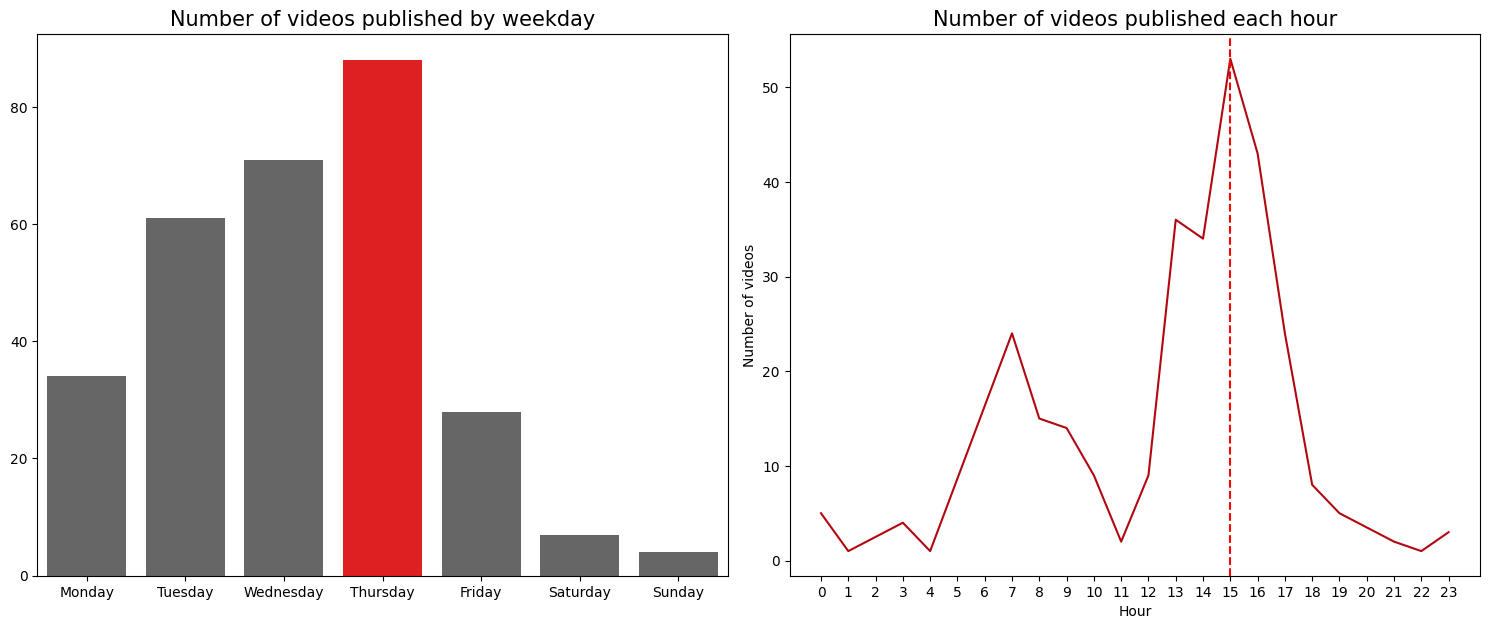

In [16]:
# draw 2 scatter plot between view count and likes, likes and comment_count
plt.figure(figsize=(15,13))
plt.subplot(2,2,1)
weekday_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

color_map2 = [custom_colors[1] for _ in range(7)]
color_map2[3]  = custom_colors[3]
sns.countplot(data=df, x='published_weekday', order=weekday_order, palette=color_map2)
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)
plt.xticks(size=10)
plt.title('Number of videos published by weekday', fontsize=15)

plt.subplot(2,2,2)
df['publish_hour'] = df['published_at'].dt.hour
# create line chart for number of videos by publish hour
df['publish_hour'].value_counts().sort_index().plot(kind='line', color=custom_colors[2])
plt.title('Number of videos published each hour', size=15)
plt.xlabel('Hour', size=10)
plt.ylabel('Number of videos', size=10)
plt.xticks(range(0,24))
# create the line for the highest point and show the name of the line
plt.axvline(x=15, color=custom_colors[3], linestyle='--',label='Peak point')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.show()


## Phân tích dữ liệu kiểu số theo mức độ tương tác (View, Like, Comment) của videos


In [17]:
# describe unique_video
df.describe()

,view_count,like_count,comment_count,publish_year,publish_hour
count,2.930000e+02,293.000000,293.000000,293.000000,293.000000
mean,1.677755e+06,21072.897611,1452.993174,2022.931741,13.167235
std,2.822287e+06,42565.697306,3559.952209,0.252622,4.108463
min,2.541900e+04,429.000000,27.000000,2022.000000,0.000000
25%,1.801110e+05,1950.000000,199.000000,2023.000000,11.000000
50%,5.305080e+05,6176.000000,461.000000,2023.000000,14.000000
75%,1.863953e+06,19082.000000,1362.000000,2023.000000,16.000000
max,1.928662e+07,434011.000000,46183.000000,2023.000000,23.000000


In [18]:
df.corr()

,view_count,like_count,comment_count,publish_year,publish_hour
view_count,1.000000,0.737783,0.549193,0.023582,0.092867
like_count,0.737783,1.000000,0.782678,0.006413,0.012665
comment_count,0.549193,0.782678,1.000000,-0.122859,-0.051448
publish_year,0.023582,0.006413,-0.122859,1.000000,-0.061556
publish_hour,0.092867,0.012665,-0.051448,-0.061556,1.000000


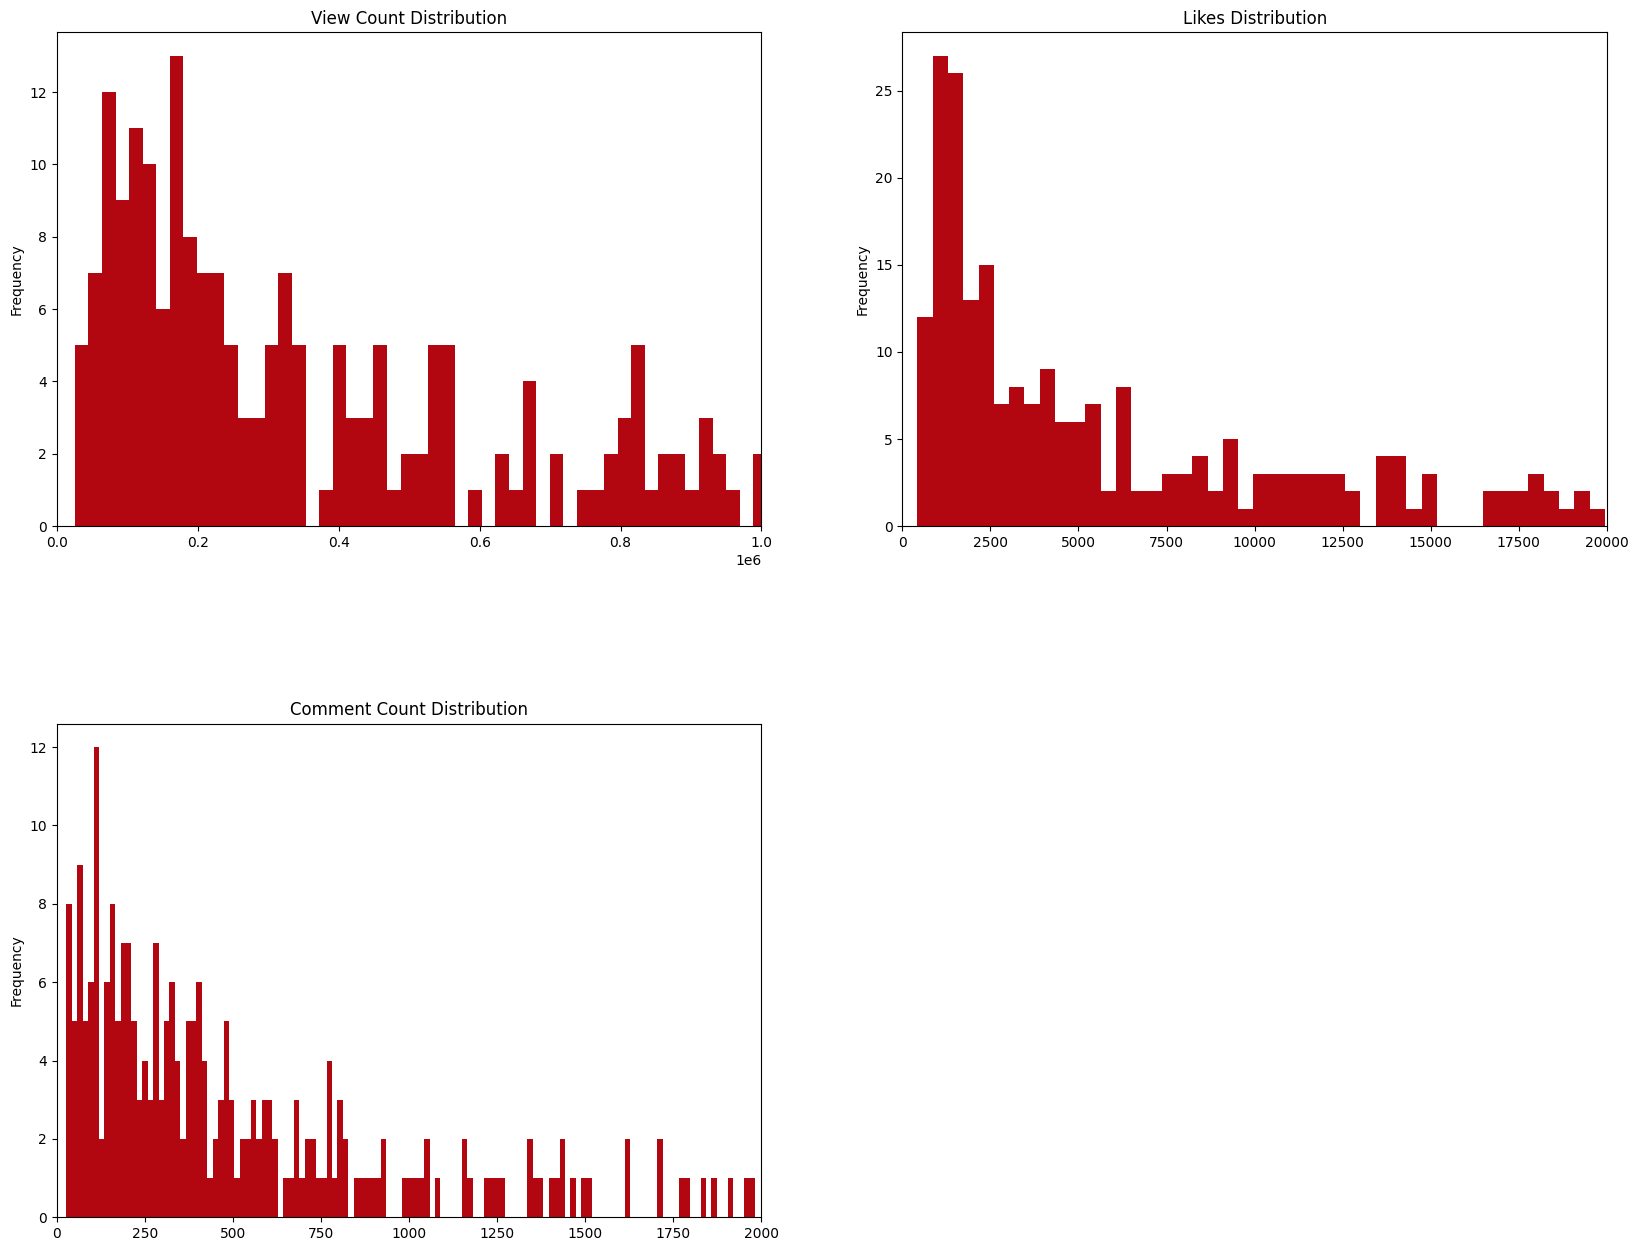

In [19]:
plt.figure(figsize = (20,15))

plt.subplot(221)
df['view_count'].plot(kind='hist',bins=1000,xlim=(0,1000000),color=custom_colors[2])
plt.title('View Count Distribution')

plt.subplot(222)
df['like_count'].plot(kind='hist',bins=1000,xlim=(0,20000),color=custom_colors[2])
plt.title('Likes Distribution')

plt.subplot(223)
df['comment_count'].plot(kind='hist',bins=3000,xlim=(0,2000),color=custom_colors[2])
plt.title('Comment Count Distribution')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


plt.show()

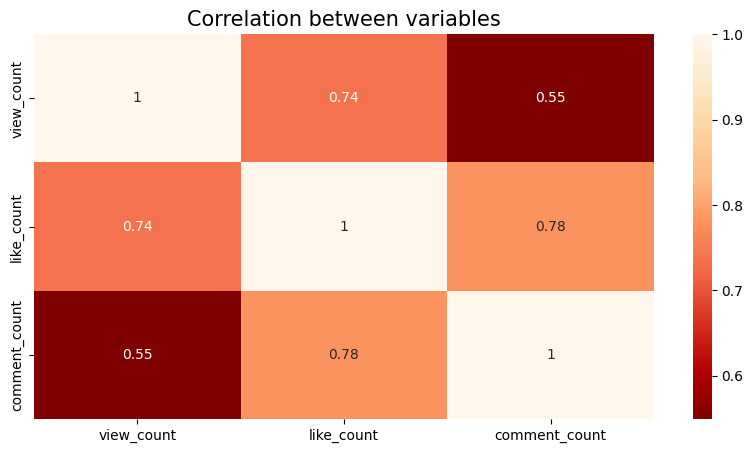

In [20]:
#correlation
plt.figure(figsize=(10,5))
sns.heatmap(df[['view_count','like_count','comment_count']].corr(), annot=True, cmap='OrRd_r')
plt.title('Correlation between variables', size=15)
plt.show()


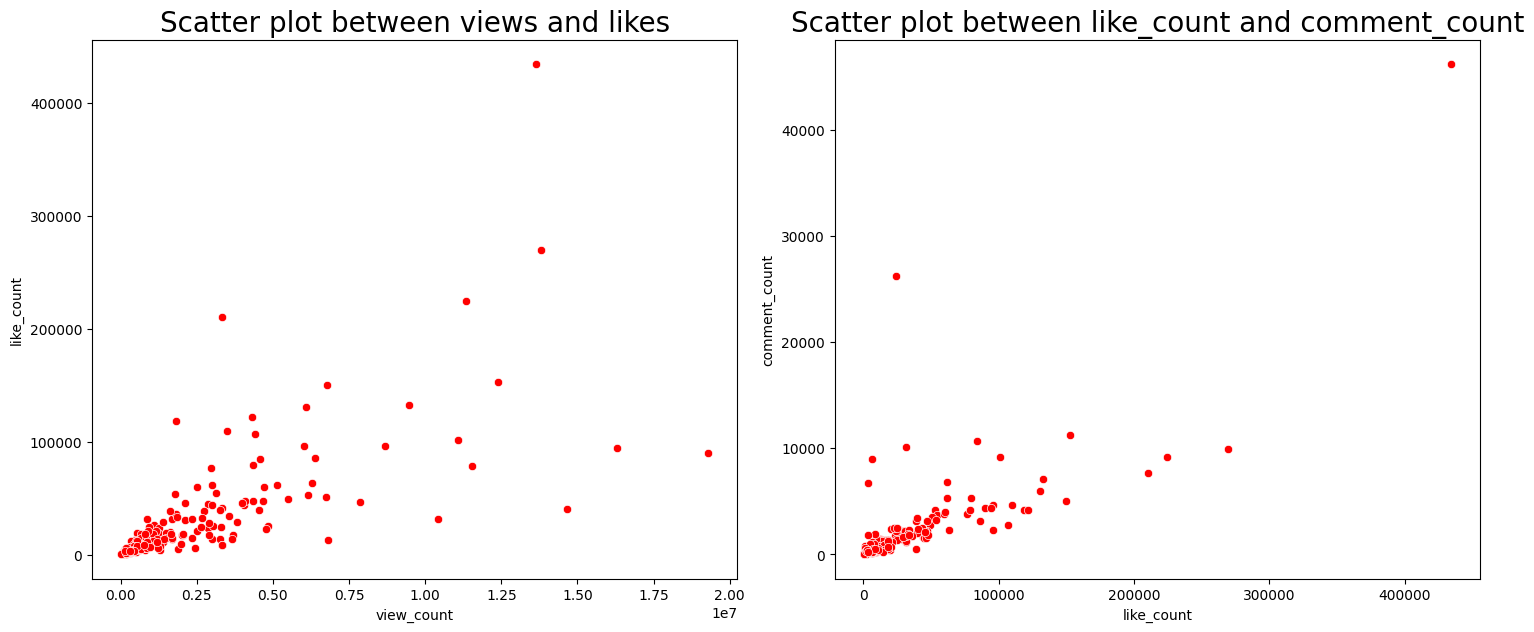

In [21]:
# draw 2 scatter plot between view count and likes, likes and comment_count
plt.figure(figsize=(15,13))
plt.subplot(2,2,1)
sns.scatterplot(x='view_count', y='like_count', data=df, color=custom_colors[3])
plt.title('Scatter plot between views and likes', size=20)

plt.subplot(2,2,2)
sns.scatterplot(x='like_count', y='comment_count', data=df, color=custom_colors[3])
plt.title('Scatter plot between like_count and comment_count', size=20)

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.show()


## Phân tích dữ liệu văn bản của Dataset Statistics

### Độ dài của tiêu đề videos

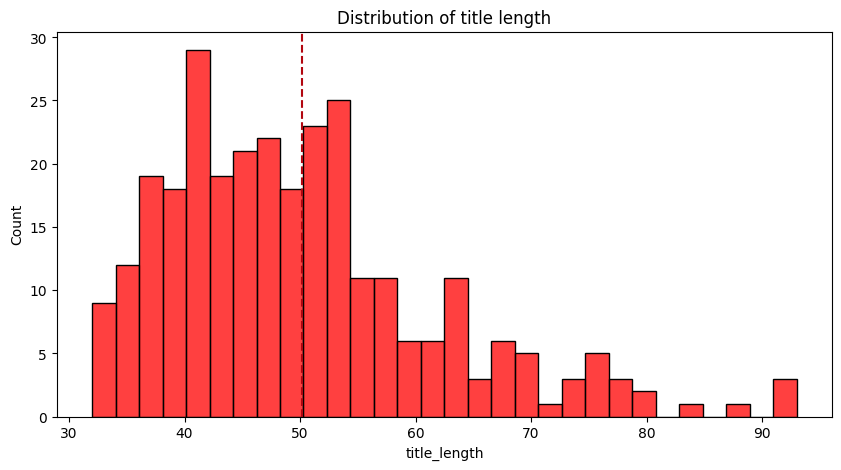

In [22]:
# Distribution of title length
df['title_length'] = df['title'].apply(lambda x: len(x))
plt.figure(figsize=(10,5))
sns.histplot(df.title_length, bins=30, color=custom_colors[3])
# add the vertical line for the average title length
plt.axvline(df.title_length.mean(), color=custom_colors[2], linestyle='--',label='Average title length')
#sns.distplot(unique_video['title_length'], bins=50, color=custom_colors[3])
plt.title('Distribution of title length')
plt.show()

### Word cloud cho tiêu đề

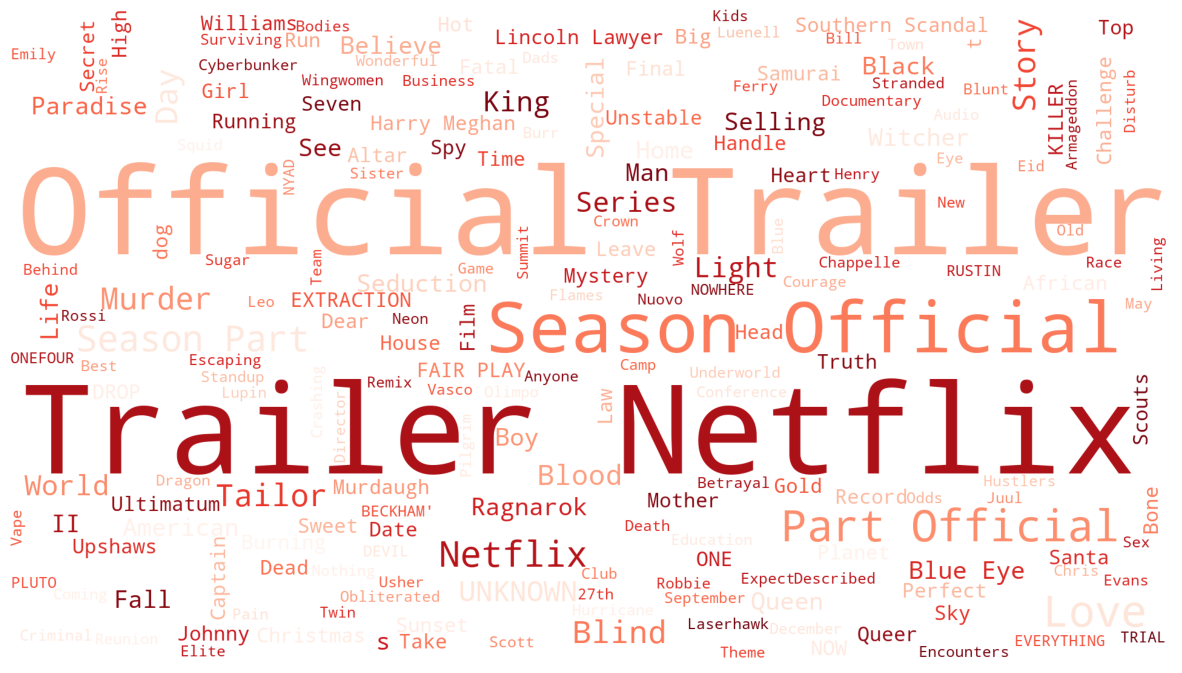

In [23]:
# Create wordcloud for title description
from wordcloud import WordCloud
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080,
                          colormap='Reds',
                         ).generate(" ".join(df.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()